# Overall data analysis

In [45]:
import os
import subprocess
from matplotlib import pyplot
import pandas as pd
import numpy as np
from tools import pixels2area, RGR
%matplotlib inline

pyplot.rcParams['figure.figsize'] = [24, 10]

os.chdir("F:/Pi10C")
data = pd.read_csv("./data.csv",delimiter=",", header=0)

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

def derivative(data, step=1):
    toReturn = []
    for i in range(0, len(data) - 1):
        toReturn.append(float(data[i + 1] - data[i])/step)
    return toReturn

def plot(data, title="Arbitrary Graph", xAxis="x", yAxis="y", save=False, loc="./fig.png", scatter=False):
    sequence = countingSequence(len(data))
    if scatter:
        pyplot.scatter(sequence, data)
    else:
        pyplot.plot(sequence, data)
    pyplot.xlabel(xAxis)
    pyplot.ylabel(yAxis)
    pyplot.title(title)
    pyplot.axhline(y=0, color="black")
    dataMin = min(data)
    dataMax = max(data)
    if dataMin > 0:
        pyplot.ylim(bottom=0, top=(1.2 * dataMax))
    if save:
        pyplot.savefig(loc)
        pyplot.cla()

def interpolate(pointIn, pointOut, missingPoints):
    height = pointOut - pointIn
    toReturn = np.zeros(missingPoints)
    step = height/(missingPoints + 1)
    for i in range(1, missingPoints + 1):
        toReturn[i - 1] = pointIn + (i * step)
    return toReturn


startOfData = 0

In [46]:
interestingData = data["InterestingPixels"][0:2000]
fluorescence = np.array([])
for i in range(0, len(interestingData)):
    if interestingData[i] == 0 and interestingData[i + 1] != 0:
        fluorescence = np.append(fluorescence, interestingData[i + 1])
        interestingData[i] = None
    if interestingData[i] == 0:
        interestingData[i] = None

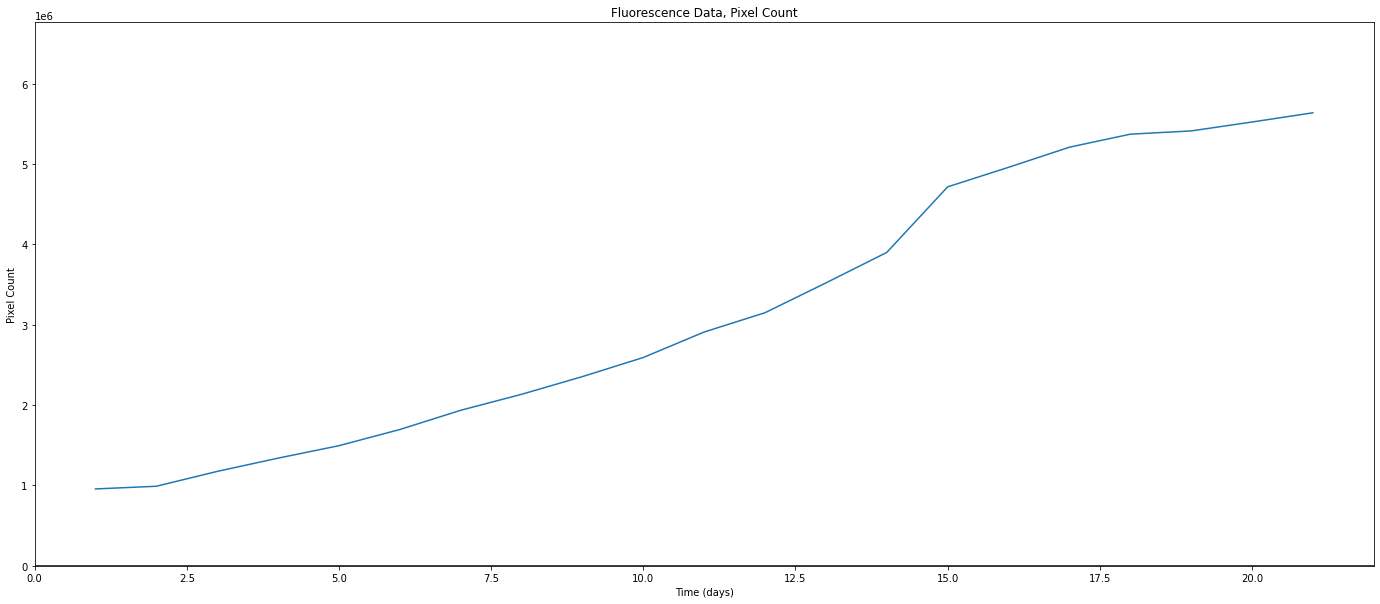

In [47]:
fluorescence = np.delete(fluorescence, [4, 12])
plot(fluorescence, title="Fluorescence Data, Pixel Count", xAxis="Time (days)", yAxis="Pixel Count")

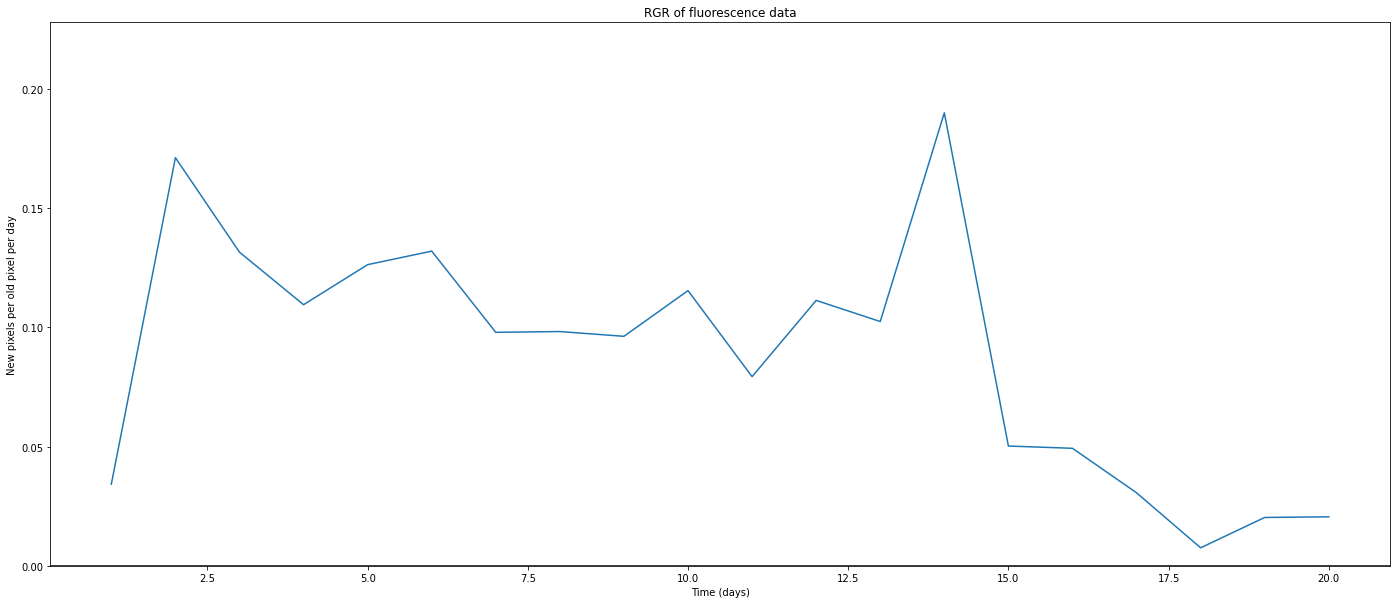

In [50]:
rgr = np.array([])
for i in range(0, len(fluorescence) - 1):
    rgr = np.append(rgr, RGR(fluorescence[i], fluorescence[i + 1]))
plot(rgr, title="RGR of fluorescence data", xAxis="Time (days)", yAxis="New pixels per old pixel per day")